# Predictive Analysis Using Machine Learning

In [32]:
from sklearn.datasets import fetch_covtype
import pandas as pd
from numpy import floor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Scenario 1 - Preparation of the Dataset 

Exercise 1.1

In [33]:
data_bunch=fetch_covtype(download_if_missing=True)

In [34]:
data=data_bunch.data
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exercise 1.2

In [36]:
df2=data.copy()

In [37]:
header=['Elevation','Aspect' ,'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am' ,'Hillshade_Noon' ,'Hillshade_3pm' ,'Horizontal_Distance_To_Fire_Points' ]
header1=[f"Wilderness_Area{x}" for x in range(1,5)]
header2=[f"Soil_Type{x}" for x in range(1,41)]

In [38]:
df2.columns=header+header1+header2

In [39]:
df2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
categorical=[]
continuous=[]
for x in df2.columns:
    if df2[x].nunique()<50:
        categorical.append(x)
    else:
        continuous.append(x)

In [46]:
len(categorical)

44

In [45]:
len(continuous)

10

In [7]:
df=data.iloc[:,:10]

In [10]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0
...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0


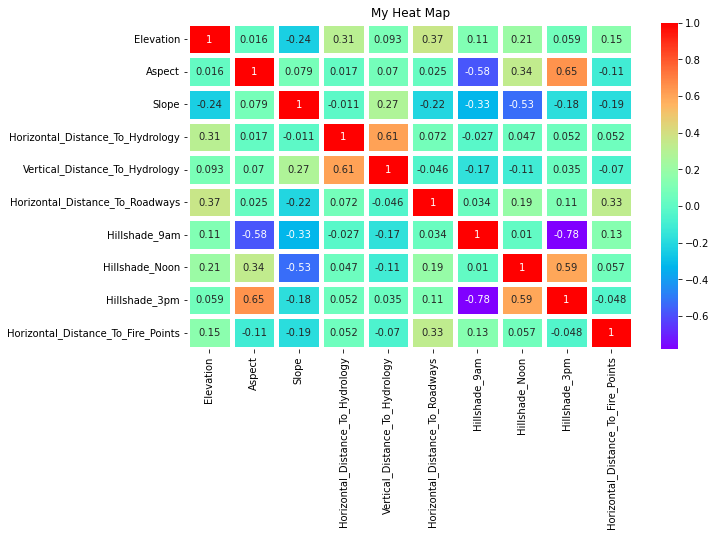

In [11]:
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()


In [12]:
df1=list(df.loc[:,'Elevation'])

In [13]:
df1

[2596.0,
 2590.0,
 2804.0,
 2785.0,
 2595.0,
 2579.0,
 2606.0,
 2605.0,
 2617.0,
 2612.0,
 2612.0,
 2886.0,
 2742.0,
 2609.0,
 2503.0,
 2495.0,
 2610.0,
 2517.0,
 2504.0,
 2503.0,
 2501.0,
 2880.0,
 2768.0,
 2511.0,
 2507.0,
 2492.0,
 2489.0,
 2962.0,
 2811.0,
 2739.0,
 2703.0,
 2522.0,
 2519.0,
 2516.0,
 2515.0,
 2900.0,
 2709.0,
 2511.0,
 2749.0,
 2686.0,
 2699.0,
 2570.0,
 2533.0,
 2703.0,
 2678.0,
 2529.0,
 2524.0,
 2536.0,
 2498.0,
 2489.0,
 2713.0,
 2739.0,
 2696.0,
 2510.0,
 2502.0,
 2722.0,
 2500.0,
 2486.0,
 2489.0,
 2489.0,
 2490.0,
 2952.0,
 2705.0,
 2507.0,
 2500.0,
 2493.0,
 2509.0,
 2919.0,
 2740.0,
 2640.0,
 2843.0,
 3008.0,
 2893.0,
 2850.0,
 2628.0,
 2864.0,
 2827.0,
 2529.0,
 2808.0,
 2840.0,
 2795.0,
 2746.0,
 2847.0,
 2840.0,
 2537.0,
 2860.0,
 2818.0,
 2801.0,
 2791.0,
 2745.0,
 2514.0,
 2788.0,
 2562.0,
 3073.0,
 2978.0,
 2860.0,
 3067.0,
 2804.0,
 2562.0,
 2567.0,
 2998.0,
 2684.0,
 2676.0,
 2863.0,
 2574.0,
 2511.0,
 3067.0,
 2909.0,
 2863.0,
 2567.0,
 3182.0,
 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
dtypes: float64(10)
memory usage: 44.3 MB


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  float64
 11  Wilderness_Area2          

In [49]:
df3=df2.iloc[:,10:].astype('int')

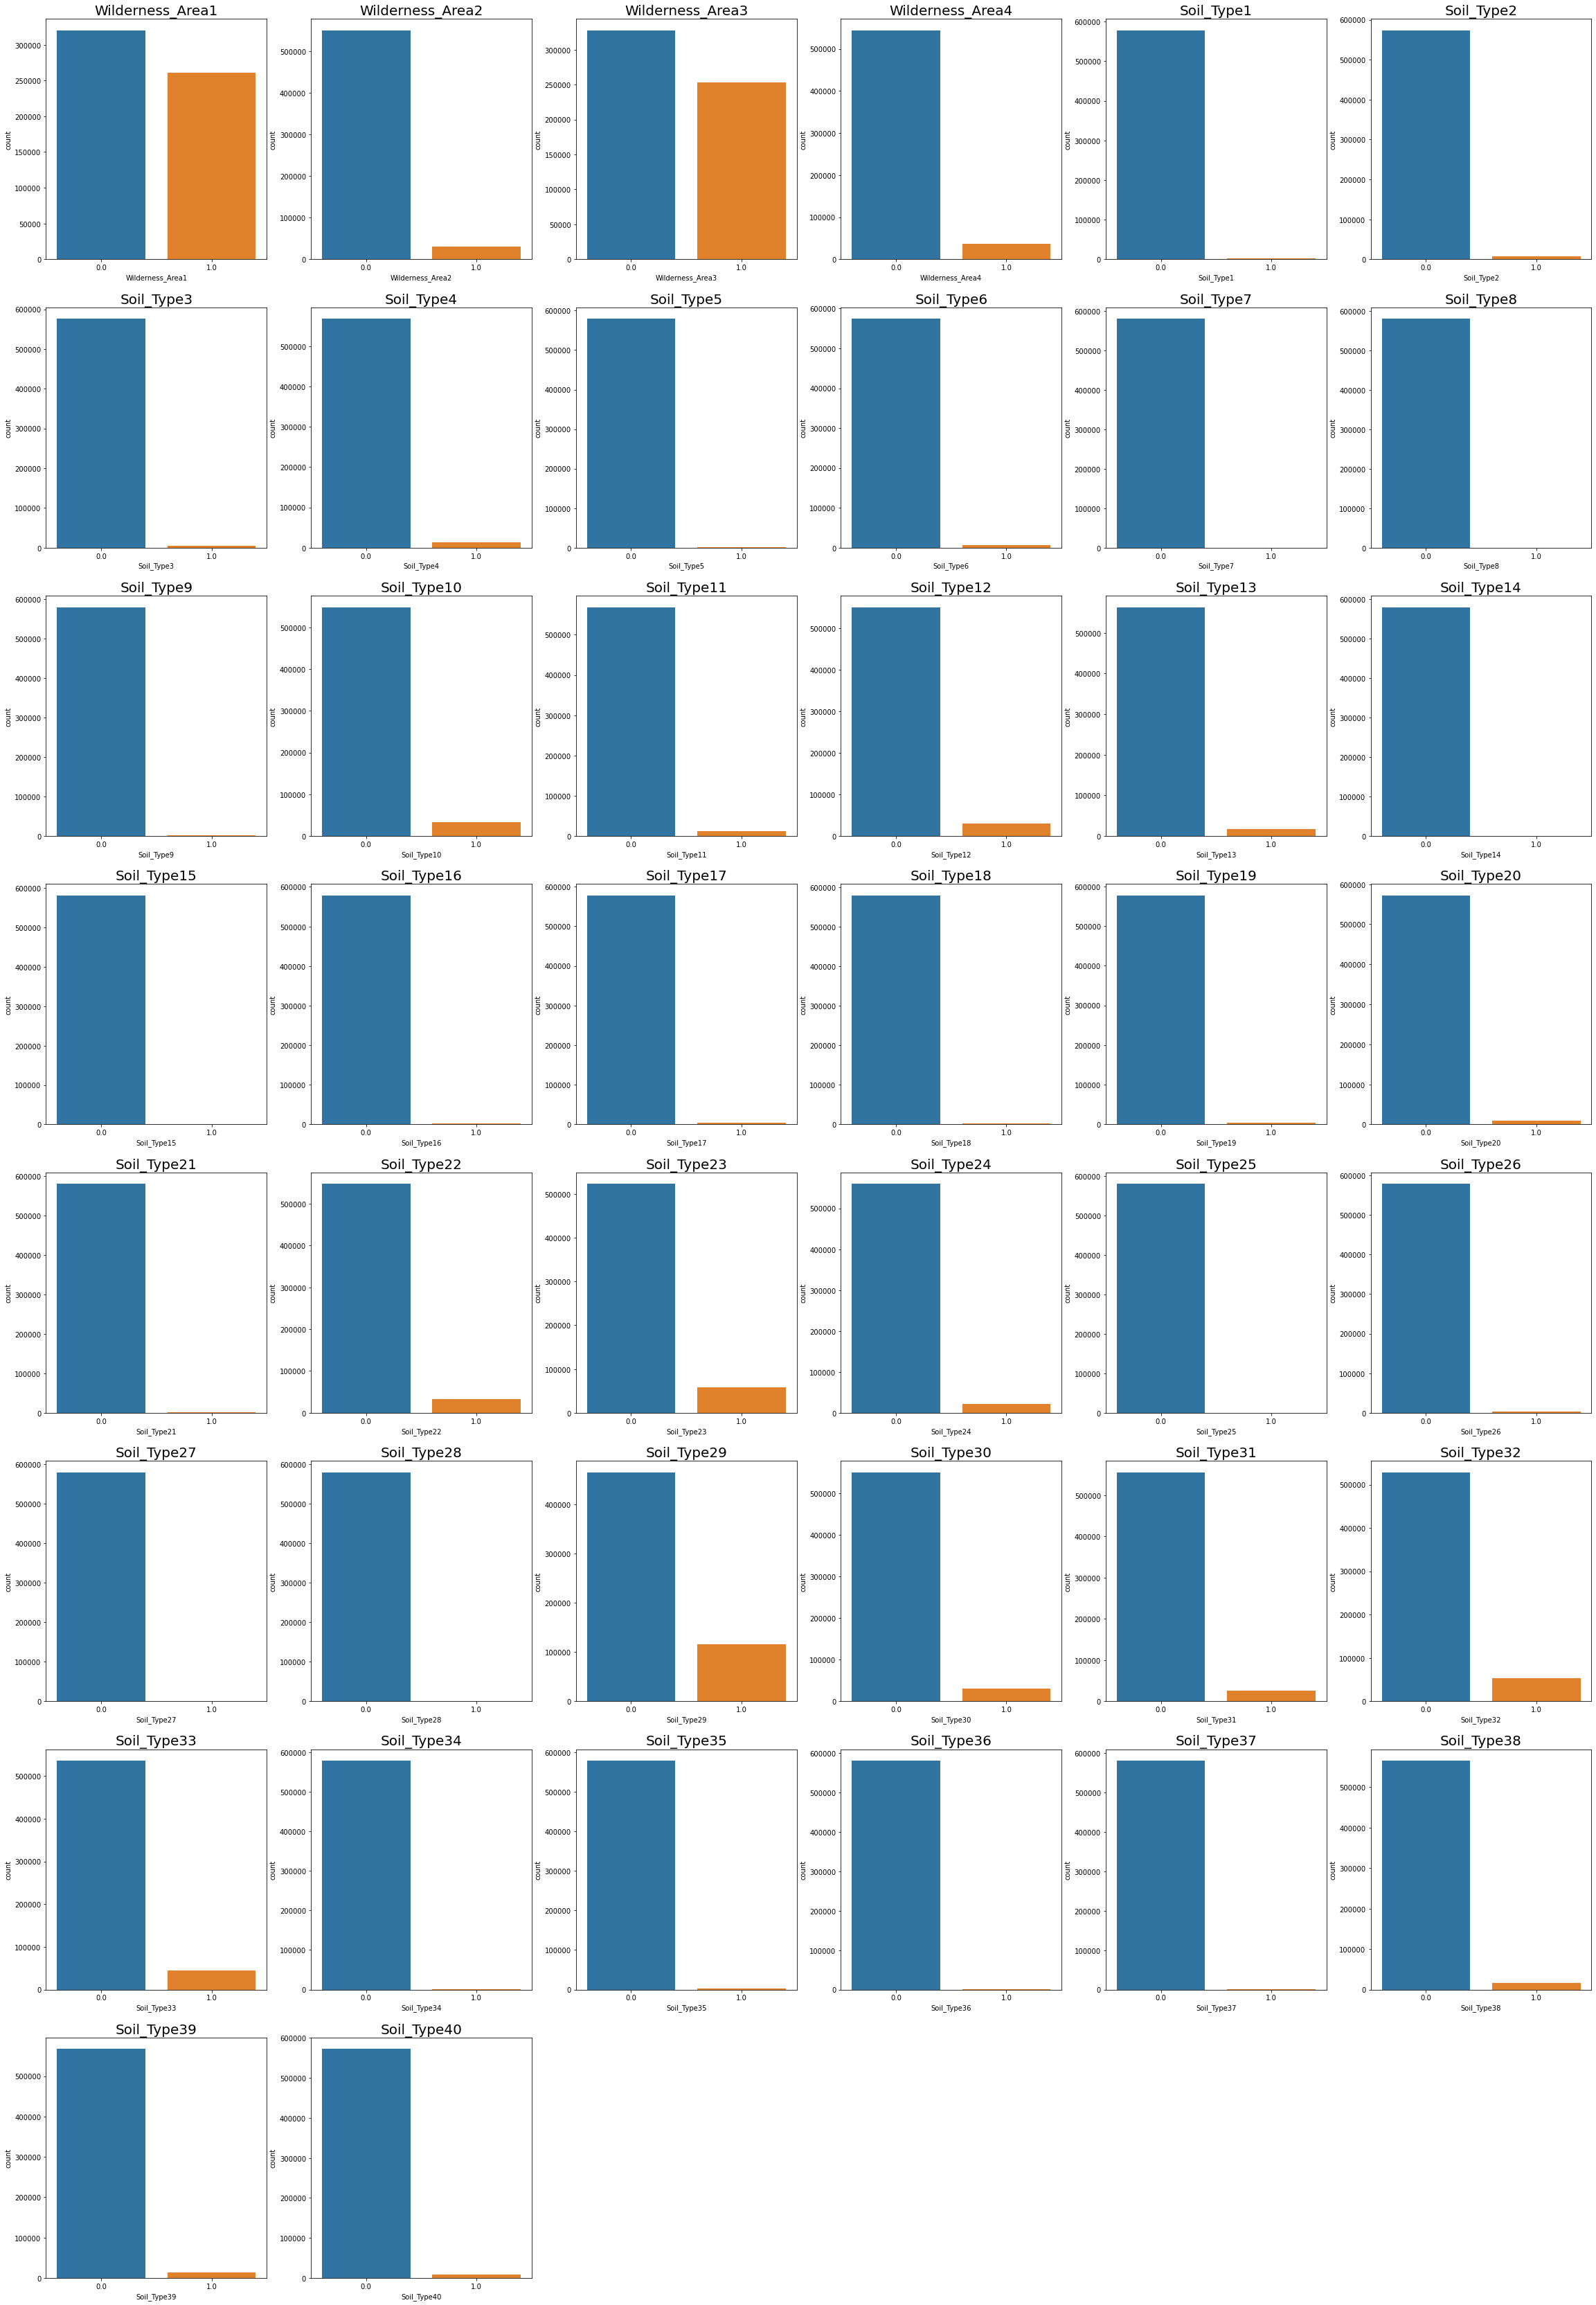

In [58]:
x=list(enumerate(df3.columns))
plt.figure(figsize=(40,60))
for y in x:
    plt.subplot(8,6,y[0]+1)
    sns.countplot(x=y[1],data=df2)
    plt.title(f"{y[1]}",fontsize=20)  
plt.show()

Exercise 1.3

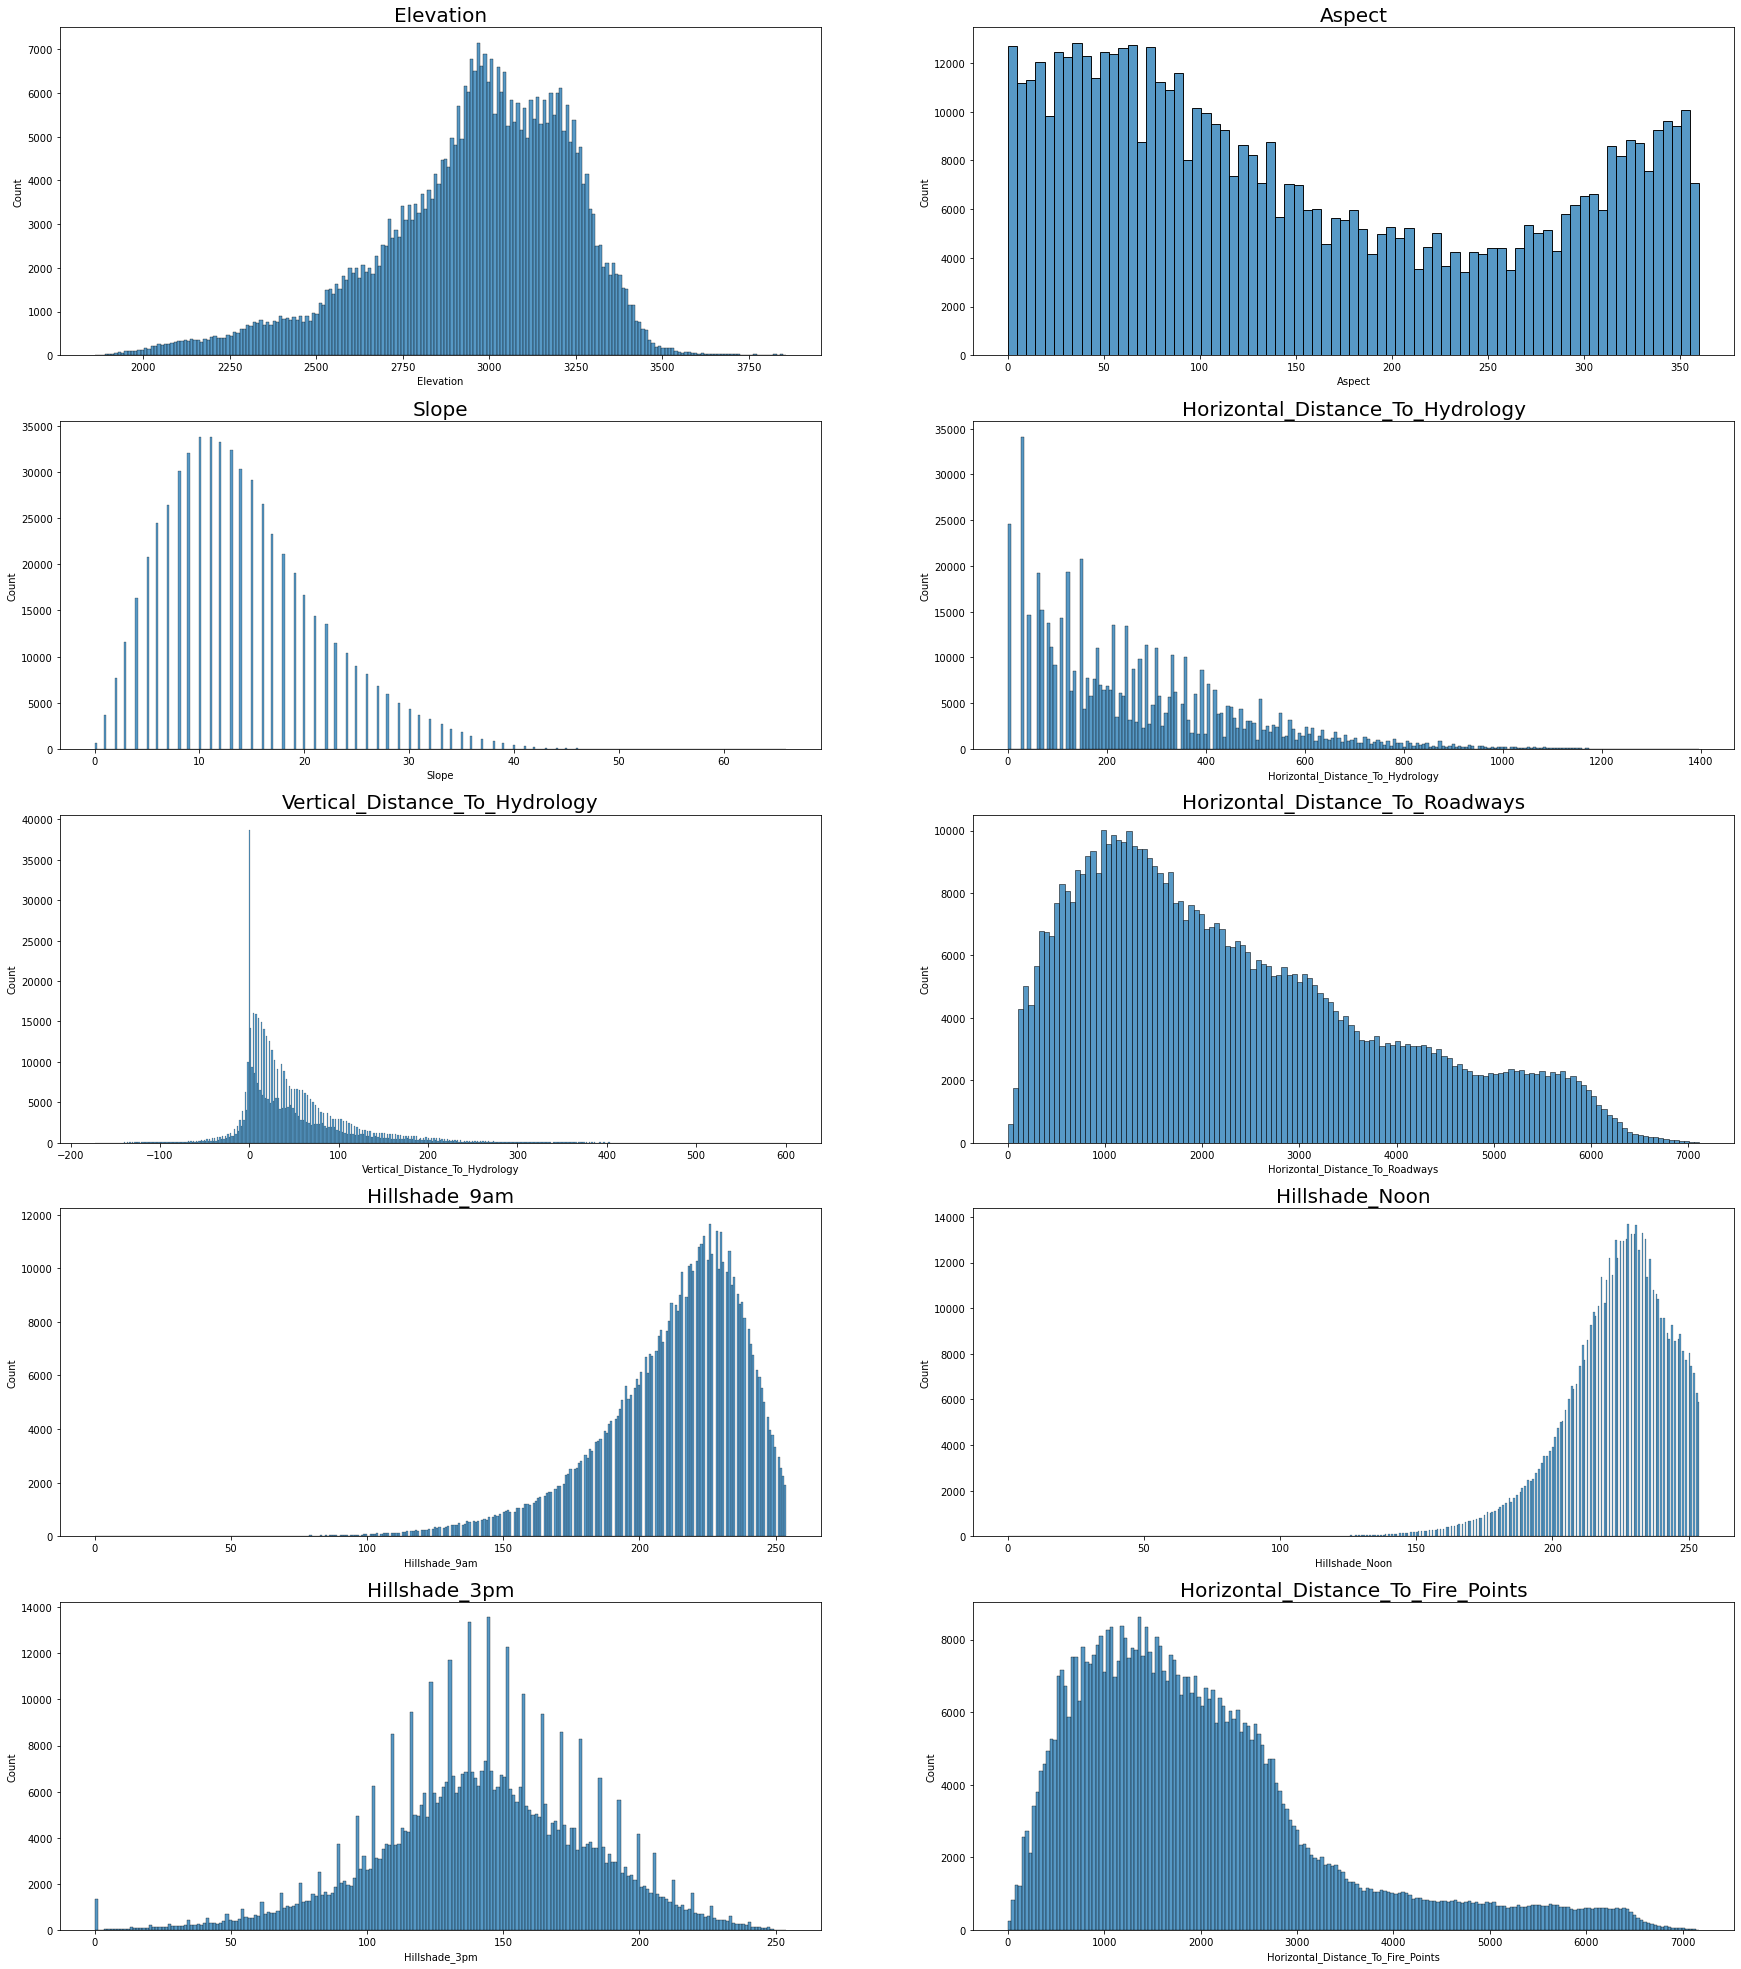

In [60]:
h=list(enumerate(header))
plt.figure(figsize=(30,35))
for x in h:
    plt.subplot(5,2,x[0]+1)
    sns.histplot(x=x[1],data=df)
    plt.title(f"{x[1]}",fontsize=20)  
plt.show()

Excercise 1.4

In [61]:
def generate_missing_value_column (row,fr):
    df[row][df.sample(frac=fr,random_state=0).index]=np.nan 

Exercise 1.5

In [62]:
generate_missing_value_column ('Elevation',0.3)

In [63]:
df.isnull().sum()

Elevation                             174304
Aspect                                     0
Slope                                      0
Horizontal_Distance_To_Hydrology           0
Vertical_Distance_To_Hydrology             0
Horizontal_Distance_To_Roadways            0
Hillshade_9am                              0
Hillshade_Noon                             0
Hillshade_3pm                              0
Horizontal_Distance_To_Fire_Points         0
dtype: int64

In [64]:
len(df1)

581012

In [94]:
from sklearn.model_selection import train_test_split
X_data=df.iloc[:,1:]
Y_data=df.iloc[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=0)

In [95]:
print(X_train)
print('------------------------------------------------------------')
print(Y_train)
print('------------------------------------------------------------')
print(X_test)
print('------------------------------------------------------------')
print(Y_test)
print('------------------------------------------------------------')

        Aspect  Slope  Horizontal_Distance_To_Hydrology  \
508161   332.0   12.0                             510.0   
296324   279.0   21.0                             277.0   
206850   145.0   22.0                             210.0   
324046    50.0   11.0                             240.0   
261800   207.0    6.0                              85.0   
...        ...    ...                               ...   
359783   187.0   17.0                              30.0   
152315   341.0   16.0                              30.0   
117952   129.0    9.0                             134.0   
435829   238.0   14.0                             153.0   
305711   258.0   26.0                             153.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
508161                            92.0                           1036.0   
296324                            18.0                           1052.0   
206850                            41.0                            

Exercise 1.6

In [142]:
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
Model.fit(X_train,Y_train)

LinearRegression()

In [143]:
Prediction=Model.predict(X_test)
Prediction

array([2865.5770153 , 2853.18022941, 2889.31582877, ..., 3145.19135919,
       2968.77223497, 2943.38917213])

In [144]:
len(Prediction)

174304

Exercise 1.7

In [145]:
from sklearn.metrics import mean_squared_error
Actual=pd.DataFrame(df1).sample(frac=0.3,random_state=0)
mean_squared_error(Prediction,Actual)

58589.03737453854

Exercise 1.8

In [146]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [147]:
model=LinearRegression()

In [148]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df2.iloc[:,:10])
X_train_minmax

array([[0.36868434, 0.14166667, 0.04545455, ..., 0.91338583, 0.58267717,
        0.87536596],
       [0.36568284, 0.15555556, 0.03030303, ..., 0.92519685, 0.59448819,
        0.86783772],
       [0.47273637, 0.38611111, 0.13636364, ..., 0.93700787, 0.53149606,
        0.85333891],
       ...,
       [0.26363182, 0.44166667, 0.25757576, ..., 0.9488189 , 0.51181102,
        0.11905758],
       [0.26263132, 0.47222222, 0.22727273, ..., 0.96456693, 0.56299213,
        0.12045169],
       [0.26213107, 0.45833333, 0.1969697 , ..., 0.96062992, 0.55511811,
        0.12198522]])

In [149]:
df4=pd.DataFrame(X_train_minmax,columns=header)
df4

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449
...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.464567,0.116688
581008,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.468504,0.117803
581009,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.511811,0.119058
581010,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.562992,0.120452


In [150]:
X1_data=df4.iloc[:,1:]
Y1_data=df4.iloc[:,0]
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1_data,Y1_data,test_size=0.3,random_state=0)

In [151]:
model=LinearRegression().fit(X1_train,Y1_train)
Prediction_m=model.predict(X1_test)
Prediction_m

array([0.50354028, 0.49733878, 0.51541562, ..., 0.64341739, 0.5551637 ,
       0.54246582])

In [152]:
mean_squared_error(Prediction_m,Y1_test)#normalized

0.014661917595750982

In [153]:
scaler = StandardScaler().fit(df2.iloc[:,:10])
scaler

StandardScaler()

In [154]:
X_scaled = scaler.transform(df2.iloc[:,:10])
X_scaled

array([[-1.29780509, -0.93515698, -1.48281978, ...,  0.43914331,
         0.1429604 ,  3.24628306],
       [-1.31923485, -0.89047967, -1.61636259, ...,  0.59089851,
         0.22134157,  3.20550354],
       [-0.5549068 , -0.14883628, -0.68156292, ...,  0.74265371,
        -0.19669136,  3.1269652 ],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ...,  0.89440891,
        -0.32732665, -0.85054846],
       [-2.05498988,  0.12816306,  0.11969395, ...,  1.09674918,
         0.01232511, -0.8429967 ],
       [-2.05856151,  0.08348575, -0.14739167, ...,  1.04616411,
        -0.03992901, -0.83468976]])

In [155]:
df5=pd.DataFrame(X_scaled,columns=header)
df5

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479
...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997


In [156]:
X2_data=df4.iloc[:,1:]
Y2_data=df4.iloc[:,0]
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2_data,Y2_data,test_size=0.3,random_state=0)

In [157]:
model.fit(X2_train,Y2_train)

LinearRegression()

In [158]:
Prediction_s=model.predict(X2_test)
Prediction_s

array([0.50354028, 0.49733878, 0.51541562, ..., 0.64341739, 0.5551637 ,
       0.54246582])

In [159]:
mean_squared_error(Prediction_s,Y2_test)#standardized

0.014661917595750982

Exercise 1.9

In [81]:
model.score(X_test,Prediction)

-4569493.087896591

In [83]:
model.score(X_train,Y_train)

-1146634.6207717299

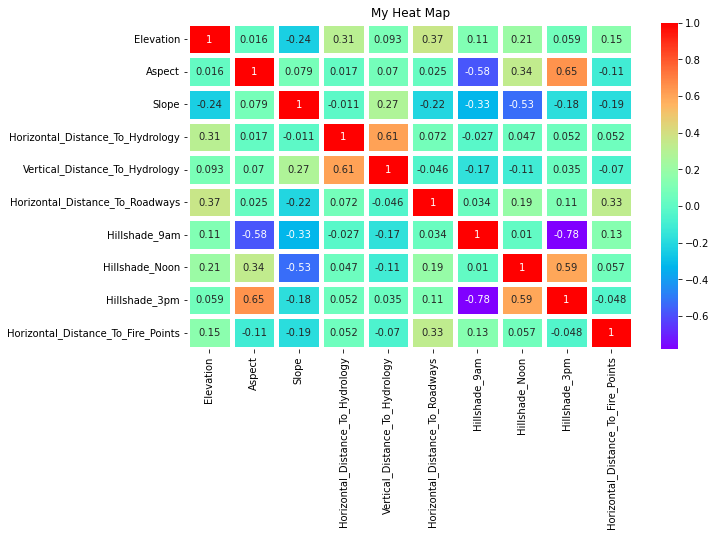

In [160]:
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df2.iloc[:,:10].corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()
